In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# To get the URL for downloading raw Github data go to the repo: (

"""https://github.com/sidharth178/Mall-Customers-Segmentation/blob/master/Dataset/Mall_Customers.csv"""

# click the three dots (...), then 'View'; on the 'View' page, grab the link and plug in as 'url' (below);

'https://github.com/sidharth178/Mall-Customers-Segmentation/blob/master/Dataset/Mall_Customers.csv'

In [3]:
# Load the Mall Customers dataset
url = "https://raw.githubusercontent.com/sidharth178/Mall-Customers-Segmentation/refs/heads/master/Dataset/Mall_Customers.csv"
df = pd.read_csv(url)

# Display the first few rows
df.shape
df.head()
df.info()

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


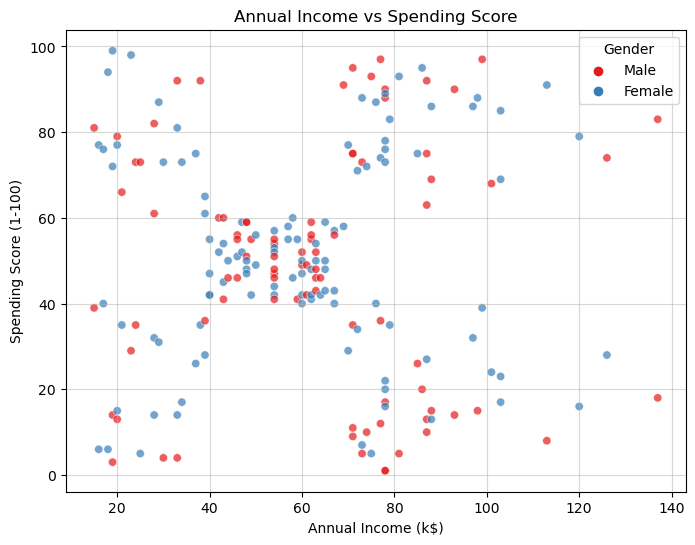

In [4]:
# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df
    , x='Annual Income (k$)'
    , y='Spending Score (1-100)'
    , hue='Gender'
    , palette='Set1'
    , alpha=0.7
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(alpha=0.5)
plt.show();

In [5]:
# Select features for clustering

# Set up X (features):
X = df[['Annual Income (k$)'
        , 'Spending Score (1-100)']]

# Scale the data *** Use MinMaxScaler for HClustering!

scaler = MinMaxScaler() # StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Verify scaling and created a scaled_df for
# spinning up a quick sns.clustermap;

scaled_df = pd.DataFrame(
    X_scaled
    , columns=X.columns
)

scaled_df.describe().round(6)

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,0.373443,0.502041
std,0.215285,0.263505
min,0.000000,0.000000
25%,0.217213,0.344388
50%,0.381148,0.500000
75%,0.516393,0.734694
max,1.000000,1.000000


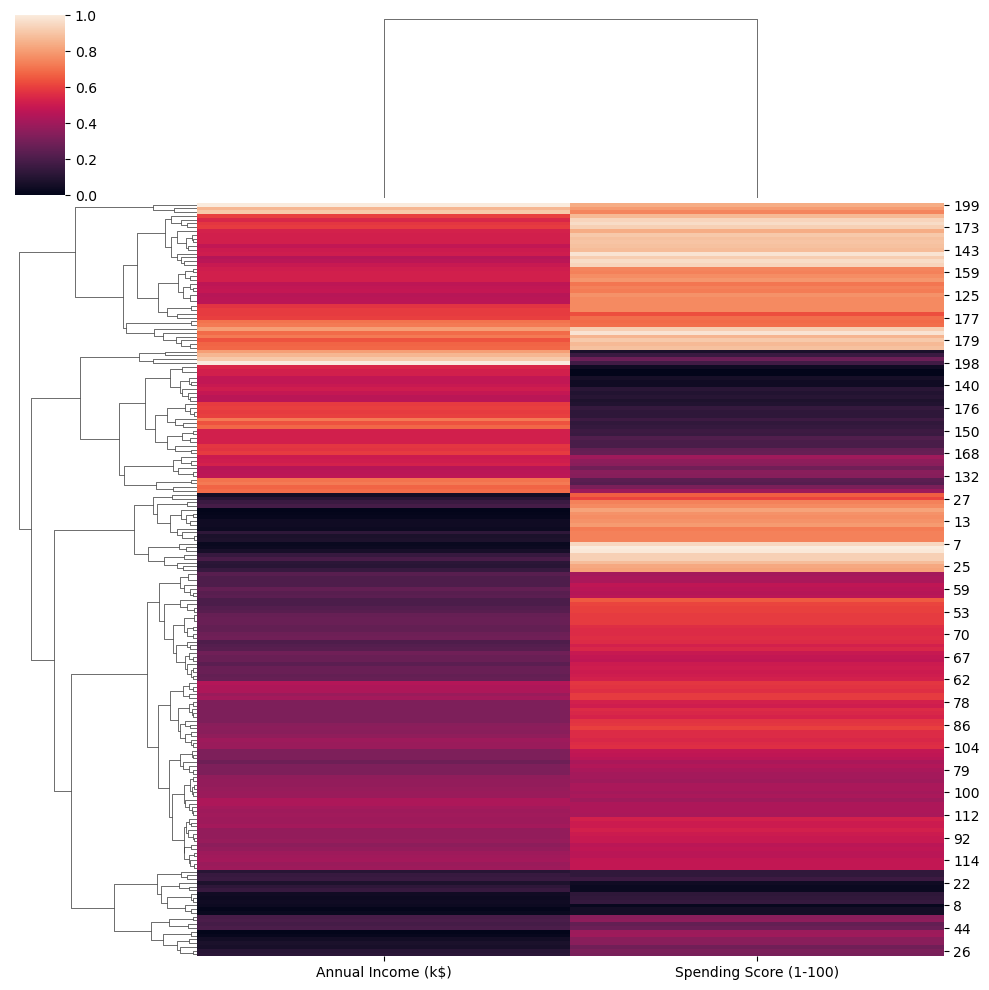

In [7]:
# Spin up a quick clustermapvor viz:

sns.clustermap(scaled_df);

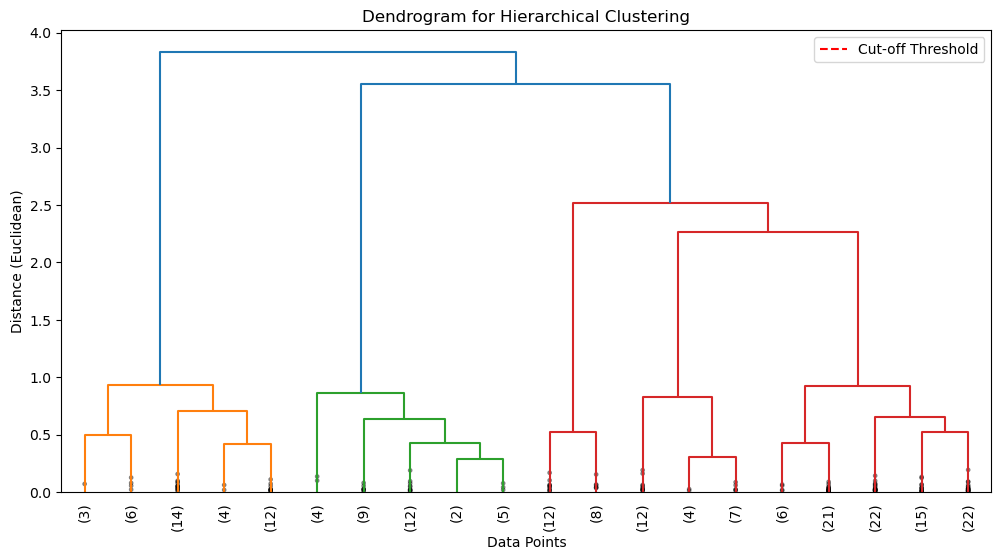

In [8]:
# Perform hierarchical clustering using the 'ward' method ('ward' minimizes the variance within clusters);

linkage_matrix = linkage(
    X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix
    , truncate_mode='lastp'  # Show the last p merged clusters
    , p=20  # Number of last clusters to show
    , leaf_rotation=90
    , leaf_font_size=10
    , show_contracted=True
)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance (Euclidean)')
plt.axhline(
    y=6, color='r'
    , linestyle='--'
    , label='Cut-off Threshold') # Adjust threshold as needed
plt.legend()
plt.show();

In [9]:
# Choose a cut-off threshold (from the dendrogram) and extract cluster labels
threshold = 6  # Adjust based on dendrogram

n_clusters = 5  # Determine based on the dendrogram

labels = fcluster(
    linkage_matrix
    , t=threshold
    , criterion='distance')

# Add the cluster labels to the original DataFrame
df['cluster'] = labels

# Display the first few rows with cluster labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [11]:
# Test different numbers of clusters and calculate silhouette scores
silhouette_scores = []

# Evaluate for 2 to 10 clusters
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(
        n_clusters=k
        , metric='euclidean'
        , linkage='ward'
    )
    labels = agg_clustering.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

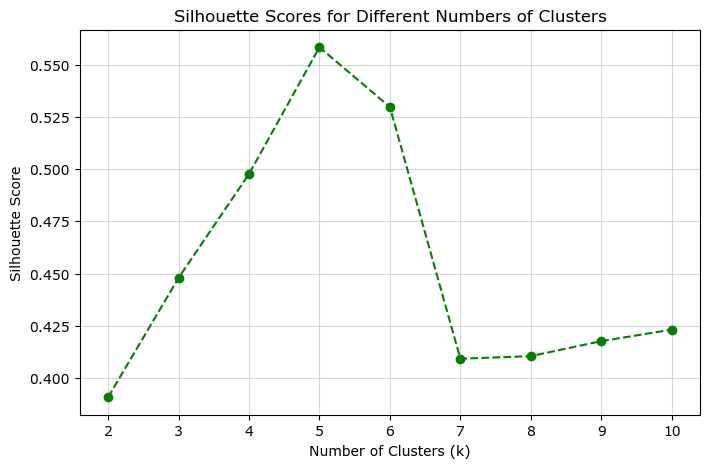

In [15]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(
    range(2, 11)
    , silhouette_scores
    , marker='o'
    , linestyle='--'
    , color='g')

plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(alpha=0.5)
plt.show();

In [16]:
# Optimal number of clusters (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 5


In [17]:
# Fit Agglomerative Clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(
    n_clusters=optimal_k
    , affinity='euclidean'
    , linkage='ward'
)
labels = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = labels

# Display the first few rows with cluster labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


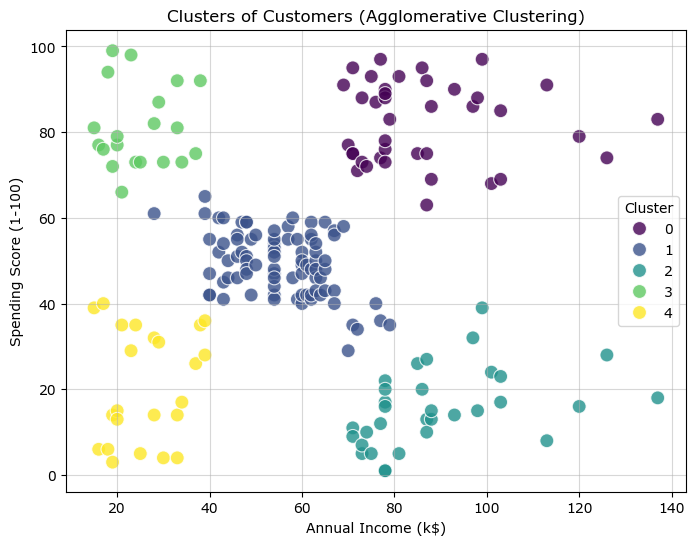

In [18]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df
    , x='Annual Income (k$)'
    , y='Spending Score (1-100)'
    , hue='cluster'
    , palette='viridis'
    , s=100
    , alpha=0.8
)
plt.title('Clusters of Customers (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show();

### **Key Takeaways**

1. **Dendrogram**:
    - Use the dendrogram to visually decide the number of clusters by cutting it at the largest gap (e.g., `y=6`).
    - The number of vertical lines intersected by the horizontal cut gives the number of clusters.
2. **Silhouette Score**:
    - Use silhouette scores to numerically evaluate cluster quality for different values of `n_clusters`.
    - Choose the `n_clusters` with the highest silhouette score.
3. **Agglomerative Clustering**:
    - Does not require initialization of centroids (unlike K-Means).
    - Handles clusters of varying sizes and shapes better than K-Means.
    - Slower for large datasets due to the calculation of pairwise distances.